In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
import string
import re

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
m
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'numpy'

In [3]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)

NameError: name 'pd' is not defined

In [3]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df = df.drop("article_link", axis=1)

In [5]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [6]:
df.headline[4]

"mother comes pretty close to using word 'streaming' correctly"

In [7]:
df.is_sarcastic[4]

1

/Users/arpit/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

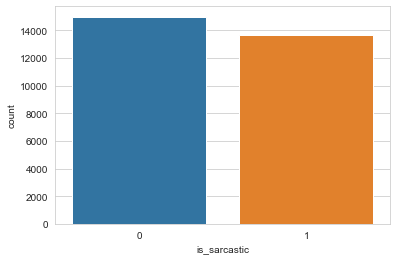

In [8]:
sns.set_style("whitegrid")
sns.countplot(df.is_sarcastic)

We can see data is balanced

# Preprocessing

In [8]:
# removing stopwords and Punctuation
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [9]:
#text = "thirtysomething scientists unveil doomsday https clock of hair loss"
#remove_between_square_brackets(text)
#remove_between_square_brackets(text)
#remove_stopwords(text)

In [10]:
# for pulling data from HTML and XML
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# remove noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [11]:
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

# Spliting the data in Training and Testing set

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df.headline,df.is_sarcastic, test_size = 0.3 , random_state = 0)

In [14]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)

Shape of x_train:  (20033,)
Shape of x_test:  (8586,)


In [15]:
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of y_train:  (20033,)
Shape of y_test:  (8586,)


# Tokenizing the text 

In [13]:
vocab_size = 20000
embedding_dim = 64
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [15]:
# printing the word index
# word index contain key value pair where key being the word and value being the token
#word_index

In [16]:
# converting training text to sequence of text 
training_sequences = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:
#training_sequences

In [18]:
#training_padded

In [19]:
# converting testing text to sequence of text 
testing_sequences = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Building RNN model using CNN 

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-01-27 21:33:55.325904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 21:33:55.326090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          41088     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,324,209
Trainable params: 1,324,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

2022-01-27 21:33:57.550837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-27 21:33:57.551406: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-01-27 21:33:57.753180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


627/627 [==============================] - ETA: 0s - loss: 0.5042 - accuracy: 0.7439

2022-01-27 21:34:11.146225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


627/627 [==============================] - 15s 20ms/step - loss: 0.5042 - accuracy: 0.7439 - val_loss: 0.4065 - val_accuracy: 0.8097
Epoch 2/50
627/627 [==============================] - 11s 17ms/step - loss: 0.1968 - accuracy: 0.9241 - val_loss: 0.4732 - val_accuracy: 0.8018
Epoch 3/50
627/627 [==============================] - 11s 17ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.6705 - val_accuracy: 0.7965
Epoch 4/50
627/627 [==============================] - 11s 17ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.8469 - val_accuracy: 0.8006
Epoch 5/50
627/627 [==============================] - 10s 17ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.9656 - val_accuracy: 0.8005
Epoch 6/50
627/627 [==============================] - 10s 16ms/step - loss: 8.6543e-04 - accuracy: 0.9998 - val_loss: 1.0259 - val_accuracy: 0.8008
Epoch 7/50
627/627 [==============================] - 10s 16ms/step - loss: 7.8878e-04 - accuracy: 0.9998 - val_loss: 1.0865 - val_accuracy: 0.

In [28]:
#Retrieve a list of list results on training and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

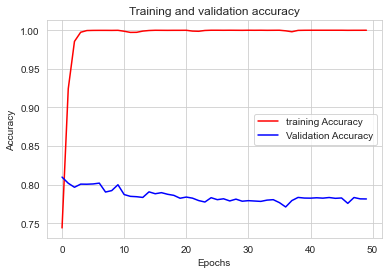

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training Accuracy", "Validation Accuracy"])

plt.figure()

<Figure size 432x288 with 0 Axes>

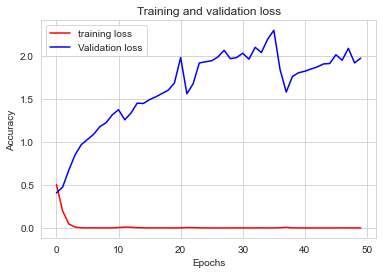

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training loss", "Validation loss"])

plt.figure()

# Model with RNN, CNN and  LSTM 

In [31]:
vocab_size = 20000
embedding_dim = 64
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50


2022-01-27 21:42:30.967784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 21:42:31.264451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 21:42:31.815104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


627/627 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5160

2022-01-27 21:42:52.334343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 21:42:52.371736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


627/627 [==============================] - 25s 36ms/step - loss: 0.6933 - accuracy: 0.5160 - val_loss: 0.6912 - val_accuracy: 0.5311
Epoch 2/50
627/627 [==============================] - 21s 33ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6917 - val_accuracy: 0.5311
Epoch 3/50
627/627 [==============================] - 21s 33ms/step - loss: 0.6925 - accuracy: 0.5208 - val_loss: 0.6913 - val_accuracy: 0.5311
Epoch 4/50
627/627 [==============================] - 21s 34ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6915 - val_accuracy: 0.5311
Epoch 5/50
627/627 [==============================] - 2070s 3s/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6915 - val_accuracy: 0.5311
Epoch 6/50
627/627 [==============================] - 608s 971ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6914 - val_accuracy: 0.5311
Epoch 7/50
627/627 [==============================] - 24s 39ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6914 - val_accuracy: 0.5311
E

In [35]:
#Retrieve a list of list results on training and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

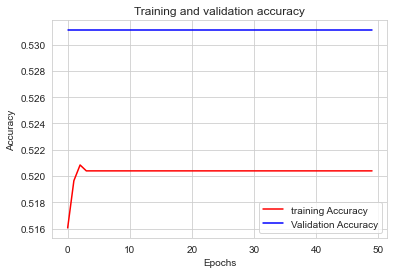

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training Accuracy", "Validation Accuracy"])

plt.figure()

<Figure size 432x288 with 0 Axes>

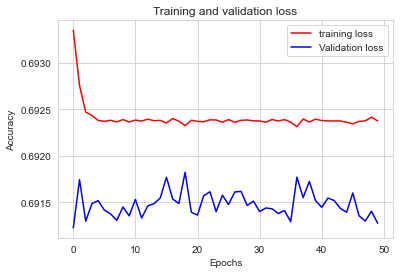

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training loss", "Validation loss"])

plt.figure()

# Model with RNN and Bidirectional LSTM

In [21]:
vocab_size = 20000
embedding_dim = 64
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_4/forward_lstm_4/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [23]:
model.summary()

NameError: name 'model' is not defined

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

2022-01-28 00:09:27.082108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-28 00:09:27.084983: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-01-28 00:09:28.211731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:28.562681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:28.587330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:29.664438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:29.673078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:32.140675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:09:32.155041: I tensorflow/core/grappler/optimizers/cust

627/627 [==============================] - ETA: 0s - loss: 0.4959 - accuracy: 0.7467

2022-01-28 00:11:46.833284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:11:46.901481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:11:46.907500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:11:47.506831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 00:11:47.513113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


627/627 [==============================] - 167s 253ms/step - loss: 0.4959 - accuracy: 0.7467 - val_loss: 0.4081 - val_accuracy: 0.8084
Epoch 2/50
627/627 [==============================] - 164s 261ms/step - loss: 0.2619 - accuracy: 0.8914 - val_loss: 0.4730 - val_accuracy: 0.8065
Epoch 3/50
627/627 [==============================] - 160s 255ms/step - loss: 0.1592 - accuracy: 0.9386 - val_loss: 0.4923 - val_accuracy: 0.7998
Epoch 4/50
627/627 [==============================] - 167s 266ms/step - loss: 0.0947 - accuracy: 0.9661 - val_loss: 0.5940 - val_accuracy: 0.8019
Epoch 5/50
627/627 [==============================] - 165s 263ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.7398 - val_accuracy: 0.7968
Epoch 6/50
627/627 [==============================] - 163s 260ms/step - loss: 0.0365 - accuracy: 0.9872 - val_loss: 0.8475 - val_accuracy: 0.7939
Epoch 7/50
627/627 [==============================] - 165s 263ms/step - loss: 0.0366 - accuracy: 0.9874 - val_loss: 0.9070 - val_accura

KeyboardInterrupt: 

In [ ]:
#Retrieve a list of list results on training and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

In [ ]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training Accuracy", "Validation Accuracy"])

plt.figure()

In [ ]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training loss", "Validation loss"])

plt.figure()

# Pre-trained Embedding model (Glove twitter)

In [ ]:
max_features = 35000
maxlen = 200

In [ ]:
EMBEDDING_FILE =  "glove.twitter.27B.200d.txt"

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [ ]:
batch_size = 128
epochs = 2
embed_size = 200

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = 10)

In [49]:
#Retrieve a list of list results on training and test data
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

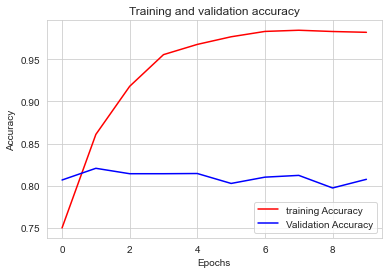

<Figure size 432x288 with 0 Axes>

In [51]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training Accuracy", "Validation Accuracy"])

plt.figure()

<Figure size 432x288 with 0 Axes>

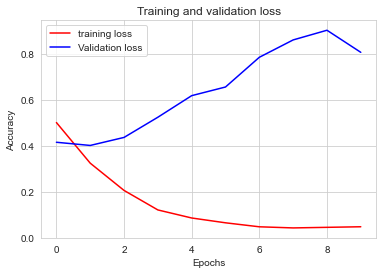

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training loss", "Validation loss"])

plt.figure()

In [53]:
model.save("pre-trained_embedding.h5")

In [57]:
classifier = "pre-trained_embedding.h5"

In [62]:
model_pre = tf.keras.models.load_model(classifier)

In [63]:
print("Accuracy of the model on testing data: ", model_pre.evaluate(x_test,y_test)[1]*100)

2022-01-27 20:14:22.632896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 20:14:22.691432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 20:14:22.698776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 17s 61ms/step - loss: 0.8051 - acc: 0.8077
Accuracy of the model on testing data:  80.77102303504944


In [70]:
pred = model_pre.predict_classes(x_test)

/Users/arpit/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [71]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.81      0.83      0.82      4560
    Sarcastic       0.81      0.78      0.79      4026

     accuracy                           0.81      8586
    macro avg       0.81      0.81      0.81      8586
 weighted avg       0.81      0.81      0.81      8586



In [74]:
conf_met = confusion_matrix(y_test, pred)

<AxesSubplot:>

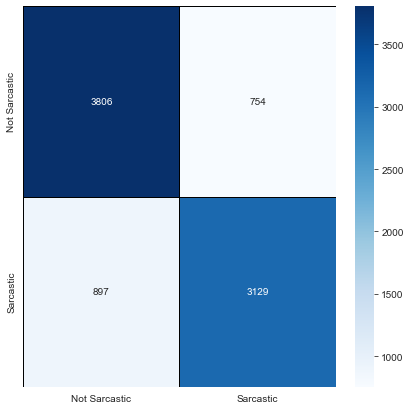

In [75]:
cm = pd.DataFrame(conf_met , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [78]:
# remove noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [82]:
def get_sentiment(headline):
    review=denoise_text(headline)
    review_seq=tokenizer.texts_to_sequences([headline])
    review_seq_pad=pad_sequences(review_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    return round(model.predict(review_seq_pad)[0][0])

In [87]:
headline = "Cows lose their jobs as milk prices drop"

In [89]:
pred = get_sentiment(headline)
if pred == 1:
    print("New headline is Sarcastic")
else:
    print("New headline is Not Sarcastic")

New headline is Sarcastic


In [96]:
headline1 = "Nikki Haley wants Joe Biden to resign"

In [97]:
pred = get_sentiment(headline1)
if pred == 1:
    print("News headline is Sarcastic")
else:
    print("News headline is Not Sarcastic")

News headline is Not Sarcastic
